In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df_asm = pd.read_csv('C:\\Users\\Vipul Singh\\Desktop\\train (1)\\ASM.csv')
df_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,size_asm,Class
0,01kcPWA9K2BOxQeS5Rju,0,782,0,127,58,0,381,0,3,...,35,137,18,66,15,43,83,0,81988,1
1,04cvLCVPqBMs6yn5xGlE,0,3414,0,123,783910,0,648,0,0,...,104,362,87,135,216,187,224,0,34287575,3
2,05aiMRw13bYWqZ8OHvjl,0,102761,0,310,26764,0,52744,0,0,...,668,1314,348,962,459,904,629,0,15800755,2
3,05Kps4iFw8mOLJZQrb1H,0,5590,0,336,3790,0,2069482,0,0,...,669,1055,344,745,446,354,251,0,77839406,2
4,05LHG8fR3iPn6agIo9z7,0,0,0,178,0,0,515,0,3,...,418,888,456,466,486,921,210,0,6959810,6


In [3]:
Y = df_asm['Class']
X = df_asm.drop(['ID', 'Class'], axis = 1)

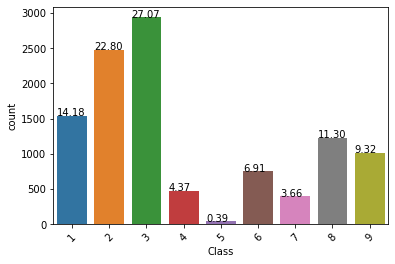

In [4]:
ax = sns.countplot(x = 'Class', data = df_asm)

for p in ax.patches:
    ax.annotate(f'{100*p.get_height()/len(df_asm):0.2f}', (p.get_x(), p.get_height()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

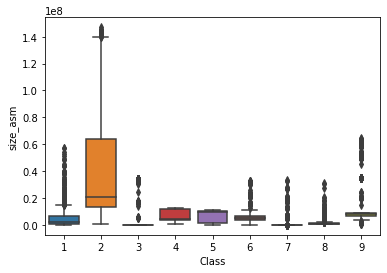

In [5]:
sns.boxplot(x = 'Class', y = 'size_asm', data = df_asm)
plt.show()

<AxesSubplot:ylabel='size_asm'>

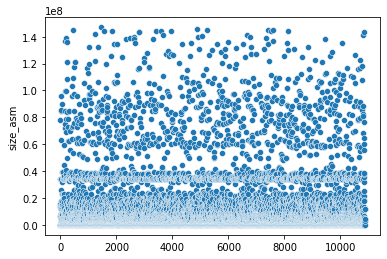

In [6]:
sns.scatterplot( x = df_asm.index, y = df_asm.size_asm,)

In [7]:
# Split the data
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3)

In [8]:
# xgboost model
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val) )

loss_c = log_loss(y_val, sig_clf.predict_proba(x_val) )

print('Train error for xgboost is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for xgboost is ',loss)

print('Train error for xgboost with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for xgboost with calliberation is ',loss_c)

c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:42:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train error for xgboost is  0.0011540342028085679
Cross Validation error for xgboost is  0.02788246228775362
Train error for xgboost with calliberation is  0.014638686003634094
Cross Validation error for xgboost with calliberation is  0.04392327323748597


In [9]:
# LightGBM ay
clf = LGBMClassifier()
clf.fit(np.array(x_train), y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)


# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val))

print('Train error for LightGBM Classifier is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for LightGBM Classifier is ',loss)

print('Train error for LightGBM Classifier with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for LightGBM Classifier with calliberation is ',loss_c)

Train error for LightGBM Classifier is  0.0005149514118895231
Cross Validation error for LightGBM Classifier is  0.047721183751148644
Train error for LightGBM Classifier with calliberation is  0.013666719067330498
Cross Validation error for LightGBM Classifier with calliberation is  0.04559533971731444


In [10]:
# RandomForest model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# predict probability
y_probs = sig_clf.predict_proba(x_val)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val))

print('Train error for Random Forest Classifier is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for Random Forest Classifier is ',loss)

print('Train error for Random Forest Classifier with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for Random Forest Classifier with calliberation is ',loss_c)

Train error for Random Forest Classifier is  0.013498939682652849
Cross Validation error for Random Forest Classifier is  0.0422659557657101
Train error for Random Forest Classifier with calliberation is  0.01553653483304013
Cross Validation error for Random Forest Classifier with calliberation is  0.03940532784905756


In [11]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

x_train_s = s.fit_transform(X = x_train)
x_val_s = s.transform(x_val)

In [12]:
# Logistic Regression model
clf = LogisticRegression(penalty='l2',class_weight='balanced', max_iter = 1500)
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train_s, y_train)

# predict probability
y_probs = clf.predict_proba(x_val_s)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val_s))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val_s))

print('Train error for LogisticRegression is ', log_loss(y_train, clf.predict_proba(x_train_s)))
print('Cross Validation error for LogisticRegression is ',loss)

print('Train error for LogisticRegression with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train_s)))
print('Cross Validation error for LogisticRegression with calliberation is ',loss_c)

c:\users\public\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train error for LogisticRegression is  2.1970688808885024
Cross Validation error for LogisticRegression is  2.1970584841039766
Train error for LogisticRegression with calliberation is  1.3486628911878684
Cross Validation error for LogisticRegression with calliberation is  1.321830587038666


In [13]:
# Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# predict probability
y_probs = sig_clf.predict_proba(x_val)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val))

print('Train error for Decision Tree Classifier is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for Decision Tree Classifier is ',loss)

print('Train error for Decision Tree Classifier with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for Decision Tree Classifier with calliberation is ',loss_c)

Train error for Decision Tree Classifier is  8.104628079763677e-15
Cross Validation error for Decision Tree Classifier is  0.5507563239912241
Train error for Decision Tree Classifier with calliberation is  0.032455432261290974
Cross Validation error for Decision Tree Classifier with calliberation is  0.08532371493586313


In [14]:
# GaussianNB model
clf = GaussianNB()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train_s, y_train)

# predict probability
y_probs = clf.predict_proba(x_val_s)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val_s))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val_s))

print('Train error for GaussianNB is ', log_loss(y_train, clf.predict_proba(x_train_s)))
print('Cross Validation error for GaussianNB is ',loss)

print('Train error for GaussianNB with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train_s)))
print('Cross Validation error for GaussianNB with calliberation is ',loss_c)

Train error for GaussianNB is  18.085695492234443
Cross Validation error for GaussianNB is  17.953072721447075
Train error for GaussianNB with calliberation is  0.8329569499985233
Cross Validation error for GaussianNB with calliberation is  0.7828201994543711


In [15]:
# Support vector model
clf = SVC(probability = True)
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train_s, y_train)

# predict probability
y_probs = clf.predict_proba(x_val_s)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val_s))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val_s))

print('Train error for SVC is ', log_loss(y_train, clf.predict_proba(x_train_s)))
print('Cross Validation error for SVC is ',loss)

print('Train error for SVC with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train_s)))
print('Cross Validation error for SVC with calliberation is ',loss_c)

Train error for SVC is  2.883945110454457
Cross Validation error for SVC is  2.8674138878786883
Train error for SVC with calliberation is  0.637559500202117
Cross Validation error for SVC with calliberation is  0.60936069851138


In [8]:
def objective(trial):
    list_trees = [100, 150, 180, 200, 300, 500, 600]
    depth = [3, 4, 5, 6, 7]
    param = {
        'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear']),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.8),
        'n_estimators' : trial.suggest_categorical('n_estimators', list_trees),
        'max_depth' : trial.suggest_categorical('max_depth', depth),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1)
            }
    clf = xgb.XGBClassifier(**param, n_jobs=4)
    clf.fit(x_train.reset_index().drop('index', axis = 1), y_train, )
    return log_loss(y_val, clf.predict_proba(x_val.reset_index().drop('index', axis = 1)))

import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-03-15 11:03:56,581] A new study created in memory with name: no-name-8a9fa01b-2b34-4168-bc5b-98d3fb92f5fa
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:03,386] Trial 0 finished with value: 0.2427165626289229 and parameters: {'booster': 'gblinear', 'learning_rate': 0.025810040196387808, 'n_estimators': 600, 'max_depth': 5, 'gamma': 0.15429513476858628}. Best is trial 0 with value: 0.2427165626289229.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:27,798] Trial 1 finished with value: 0.04510479142690321 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5258574854459399, 'n_estimators': 600, 'max_depth': 6, 'gamma': 0.760273273540142}. Best is trial 1 with value: 0.04510479142690321.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:29,407] Trial 2 finished with value: 1.3152315800027208 and parameters: {'booster': 'gblinear', 'learning_rate': 0.003496282508985363, 'n_estimators': 180, 'max_depth': 6, 'gamma': 0.3630203140510063}. Best is trial 1 with value: 0.04510479142690321.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:33,522] Trial 3 finished with value: 0.03523776548172694 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5244598514606865, 'n_estimators': 300, 'max_depth': 7, 'gamma': 0.002270781471471118}. Best is trial 3 with value: 0.03523776548172694.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:36,154] Trial 4 finished with value: 0.801082036408664 and parameters: {'booster': 'gblinear', 'learning_rate': 0.006438015019214684, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0.8336179499232902}. Best is trial 3 with value: 0.03523776548172694.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:38,786] Trial 5 finished with value: 1.0613159249047013 and parameters: {'booster': 'gblinear', 'learning_rate': 0.003605089706404438, 'n_estimators': 300, 'max_depth': 5, 'gamma': 0.0022047308538720046}. Best is trial 3 with value: 0.03523776548172694.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:40,114] Trial 6 finished with value: 0.7830669986546962 and parameters: {'booster': 'gblinear', 'learning_rate': 0.013505569145933542, 'n_estimators': 150, 'max_depth': 3, 'gamma': 0.08910073360250287}. Best is trial 3 with value: 0.03523776548172694.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:49,272] Trial 7 finished with value: 0.27108949892581585 and parameters: {'booster': 'gbtree', 'learning_rate': 0.01074327070619579, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.004096408297830795}. Best is trial 3 with value: 0.03523776548172694.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:58,068] Trial 8 finished with value: 0.034763291230003046 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2515954323631537, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.017799969351346076}. Best is trial 8 with value: 0.034763291230003046.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:04:59,818] Trial 9 finished with value: 0.7531872640574602 and parameters: {'booster': 'gblinear', 'learning_rate': 0.012082488262534448, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.0024748553627180012}. Best is trial 8 with value: 0.034763291230003046.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:05:10,521] Trial 10 finished with value: 0.035213521262491033 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1321496584644792, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.015014063017738387}. Best is trial 8 with value: 0.034763291230003046.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:05:21,492] Trial 11 finished with value: 0.03495188227942771 and parameters: {'booster': 'gbtree', 'learning_rate': 0.13180908346725076, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.01747667317259989}. Best is trial 8 with value: 0.034763291230003046.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:05:33,167] Trial 12 finished with value: 0.03435742851962503 and parameters: {'booster': 'gbtree', 'learning_rate': 0.10115167189530191, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.01717295401705195}. Best is trial 12 with value: 0.03435742851962503.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:05:37,600] Trial 13 finished with value: 0.03811632757033024 and parameters: {'booster': 'gbtree', 'learning_rate': 0.10998940952617475, 'n_estimators': 100, 'max_depth': 5, 'gamma': 0.04118413541892237}. Best is trial 12 with value: 0.03435742851962503.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:05:52,330] Trial 14 finished with value: 0.035181219520234744 and parameters: {'booster': 'gbtree', 'learning_rate': 0.05446137561730412, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.008725653950368067}. Best is trial 12 with value: 0.03435742851962503.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:06:01,641] Trial 15 finished with value: 0.03422378240855059 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2723426196165618, 'n_estimators': 500, 'max_depth': 3, 'gamma': 0.04613482098355978}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:06:19,471] Trial 16 finished with value: 1.102930883127866 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0010983204145873153, 'n_estimators': 500, 'max_depth': 3, 'gamma': 0.05193087587768279}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:06:23,373] Trial 17 finished with value: 0.03627350338848808 and parameters: {'booster': 'gbtree', 'learning_rate': 0.29626303725905884, 'n_estimators': 150, 'max_depth': 3, 'gamma': 0.17740165632514976}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:06:36,596] Trial 18 finished with value: 0.03551933628473671 and parameters: {'booster': 'gbtree', 'learning_rate': 0.05628499379313119, 'n_estimators': 500, 'max_depth': 3, 'gamma': 0.07163322049205939}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:06:39,446] Trial 19 finished with value: 0.036338752297723695 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7932075440025512, 'n_estimators': 200, 'max_depth': 3, 'gamma': 0.00612872124967226}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:06:43,206] Trial 20 finished with value: 0.08427951359000127 and parameters: {'booster': 'gbtree', 'learning_rate': 0.05265761819035579, 'n_estimators': 100, 'max_depth': 3, 'gamma': 0.027871364664105475}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:06:52,980] Trial 21 finished with value: 0.03434183300630201 and parameters: {'booster': 'gbtree', 'learning_rate': 0.25678552080084055, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.020993349227450723}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:01,958] Trial 22 finished with value: 0.03566032298034225 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2513177624423324, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.0106520071542371}. Best is trial 15 with value: 0.03422378240855059.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:13,836] Trial 23 finished with value: 0.03216183531667431 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09586621445030793, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.02869823234775608}. Best is trial 23 with value: 0.03216183531667431.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:23,429] Trial 24 finished with value: 0.03108463519127723 and parameters: {'booster': 'gbtree', 'learning_rate': 0.37555011321616716, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.032473877355049814}. Best is trial 24 with value: 0.03108463519127723.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:35,450] Trial 25 finished with value: 0.036340352196860604 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7232608026702657, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.12325589039375133}. Best is trial 24 with value: 0.03108463519127723.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:41,841] Trial 26 finished with value: 0.03008963821607099 and parameters: {'booster': 'gbtree', 'learning_rate': 0.4163768127068776, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.0010082221310943628}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:45,168] Trial 27 finished with value: 0.03143211045792793 and parameters: {'booster': 'gbtree', 'learning_rate': 0.47990173960250915, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0010463945724134022}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:48,630] Trial 28 finished with value: 0.031821680169374006 and parameters: {'booster': 'gbtree', 'learning_rate': 0.454586385423118, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0011961837245310649}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:07:52,158] Trial 29 finished with value: 0.030764212303999373 and parameters: {'booster': 'gbtree', 'learning_rate': 0.4139247659679021, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0013265045618210192}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:14,866] Trial 30 finished with value: 0.03515783556269363 and parameters: {'booster': 'gbtree', 'learning_rate': 0.02418518686471942, 'n_estimators': 600, 'max_depth': 4, 'gamma': 0.0015064967606650357}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:17,664] Trial 31 finished with value: 0.03437424285954225 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7973784284416208, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0010258556041163507}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:21,378] Trial 32 finished with value: 0.03242183137598011 and parameters: {'booster': 'gbtree', 'learning_rate': 0.39141992239612927, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.004119966216619913}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:26,558] Trial 33 finished with value: 0.03226839549992773 and parameters: {'booster': 'gbtree', 'learning_rate': 0.17513907959223066, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.001021454627265187}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:33,228] Trial 34 finished with value: 0.034741891493261706 and parameters: {'booster': 'gbtree', 'learning_rate': 0.6168981941171047, 'n_estimators': 600, 'max_depth': 6, 'gamma': 0.001691426108406056}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:36,939] Trial 35 finished with value: 0.031024265680568926 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3974697534993841, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0041015714285510116}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:38,768] Trial 36 finished with value: 0.23963228195638686 and parameters: {'booster': 'gblinear', 'learning_rate': 0.18356852416892666, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.0033029811366613654}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:42,799] Trial 37 finished with value: 0.03153817667965363 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3735978031583451, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.006562228501051653}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:44,084] Trial 38 finished with value: 10.114851720272416 and parameters: {'booster': 'gblinear', 'learning_rate': 0.5373146178152752, 'n_estimators': 150, 'max_depth': 7, 'gamma': 0.0018136189447682113}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:08:55,778] Trial 39 finished with value: 0.041767927901822204 and parameters: {'booster': 'gbtree', 'learning_rate': 0.18666505110384668, 'n_estimators': 300, 'max_depth': 6, 'gamma': 0.31076720907546407}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:03,131] Trial 40 finished with value: 0.03533178827296442 and parameters: {'booster': 'gbtree', 'learning_rate': 0.06804298151467314, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0033241345098747196}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:07,045] Trial 41 finished with value: 0.0322106741787408 and parameters: {'booster': 'gbtree', 'learning_rate': 0.39295412171351646, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0012546168591488446}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:10,274] Trial 42 finished with value: 0.03270670586798707 and parameters: {'booster': 'gbtree', 'learning_rate': 0.562531055962347, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.002498069855672795}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:12,981] Trial 43 finished with value: 0.03560491733467982 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7949245574151638, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0010612785936984941}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:16,713] Trial 44 finished with value: 0.03130645624313274 and parameters: {'booster': 'gbtree', 'learning_rate': 0.33264935537211987, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.001998141408770922}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:21,740] Trial 45 finished with value: 0.03192815390484366 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1804861273951819, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.0021457935073509295}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:23,224] Trial 46 finished with value: 12.211962338716331 and parameters: {'booster': 'gblinear', 'learning_rate': 0.2913340083130422, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.005109322505924034}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:27,062] Trial 47 finished with value: 0.03482205259645368 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3725544574857749, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.0029206819721052527}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:30,783] Trial 48 finished with value: 0.034469772472580165 and parameters: {'booster': 'gbtree', 'learning_rate': 0.13693526049145924, 'n_estimators': 100, 'max_depth': 4, 'gamma': 0.012276911978078347}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:35,082] Trial 49 finished with value: 0.03289838626558605 and parameters: {'booster': 'gbtree', 'learning_rate': 0.6688988608841776, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0.007944933196613869}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:46,670] Trial 50 finished with value: 1.646618748763996 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0010010820069176925, 'n_estimators': 180, 'max_depth': 6, 'gamma': 0.0016906016320106189}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:50,094] Trial 51 finished with value: 0.030877754867223498 and parameters: {'booster': 'gbtree', 'learning_rate': 0.49942564472133655, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0014081960130150125}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:09:54,111] Trial 52 finished with value: 0.032132399102217 and parameters: {'booster': 'gbtree', 'learning_rate': 0.32873226992027876, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0015189192189479506}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:03,423] Trial 53 finished with value: 0.031329580627800904 and parameters: {'booster': 'gbtree', 'learning_rate': 0.22790026961923363, 'n_estimators': 600, 'max_depth': 4, 'gamma': 0.0021401218146398274}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:06,349] Trial 54 finished with value: 0.030791342548451932 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5359912586050858, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.004133807407905616}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:09,608] Trial 55 finished with value: 0.03199970319495206 and parameters: {'booster': 'gbtree', 'learning_rate': 0.47360105946766695, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.03571546419389046}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:12,320] Trial 56 finished with value: 0.03162266217085544 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5909306308642952, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.004083103023905207}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:16,498] Trial 57 finished with value: 0.03190231683573558 and parameters: {'booster': 'gbtree', 'learning_rate': 0.21856557576167765, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.022371532619837355}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:39,976] Trial 58 finished with value: 0.8592852912443396 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0015383704206565812, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.07500741087285889}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:41,470] Trial 59 finished with value: 1.2271456298853656 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0050811822133489315, 'n_estimators': 150, 'max_depth': 7, 'gamma': 0.013337060928293152}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:51,989] Trial 60 finished with value: 0.03207068307619111 and parameters: {'booster': 'gbtree', 'learning_rate': 0.4282250513284093, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.05557450929867468}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:56,235] Trial 61 finished with value: 0.032133460191769055 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2872950640522712, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.0014086137761120175}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:10:59,014] Trial 62 finished with value: 0.031326523000841947 and parameters: {'booster': 'gbtree', 'learning_rate': 0.32632262266688894, 'n_estimators': 100, 'max_depth': 4, 'gamma': 0.002603196610725702}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:11:04,709] Trial 63 finished with value: 0.03457638496189105 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7811376343093461, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.0039037789399103177}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:11:07,971] Trial 64 finished with value: 0.03167884475985349 and parameters: {'booster': 'gbtree', 'learning_rate': 0.49126063663801733, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.005193659921595782}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:11:11,058] Trial 65 finished with value: 0.03319454445840461 and parameters: {'booster': 'gbtree', 'learning_rate': 0.6479011128623575, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.002100120902317973}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:11:19,350] Trial 66 finished with value: 0.031212569944381516 and parameters: {'booster': 'gbtree', 'learning_rate': 0.22221324152762786, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.0013274378718384815}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:11:36,860] Trial 67 finished with value: 0.03424666534224082 and parameters: {'booster': 'gbtree', 'learning_rate': 0.034988525489649154, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.0012184359795462142}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:11:46,974] Trial 68 finished with value: 0.03133544160993619 and parameters: {'booster': 'gbtree', 'learning_rate': 0.14008364475404078, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.009168446024407254}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:11:57,775] Trial 69 finished with value: 0.03595739525737282 and parameters: {'booster': 'gbtree', 'learning_rate': 0.21959006477531096, 'n_estimators': 500, 'max_depth': 6, 'gamma': 0.026343747748176785}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:10,412] Trial 70 finished with value: 0.032488797898587156 and parameters: {'booster': 'gbtree', 'learning_rate': 0.08504355419000802, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.0013313422524644867}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:13,747] Trial 71 finished with value: 0.031038357239280594 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3391411287066668, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.0017414206264711367}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:16,757] Trial 72 finished with value: 0.03230654286348598 and parameters: {'booster': 'gbtree', 'learning_rate': 0.44474707610369324, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.0027498174966535667}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:19,659] Trial 73 finished with value: 0.03077108880328135 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5172386149003667, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.0010636483071629363}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:22,531] Trial 74 finished with value: 0.031731960799375084 and parameters: {'booster': 'gbtree', 'learning_rate': 0.526387502427607, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.0010561021947008812}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:24,875] Trial 75 finished with value: 0.035954895737840595 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7966868099884595, 'n_estimators': 150, 'max_depth': 3, 'gamma': 0.0018940901408199377}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:27,450] Trial 76 finished with value: 0.03158869646144211 and parameters: {'booster': 'gbtree', 'learning_rate': 0.6544833881285618, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.001557946799996104}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:30,974] Trial 77 finished with value: 0.03518035037550164 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3642278299567592, 'n_estimators': 150, 'max_depth': 5, 'gamma': 0.0010067784094409794}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:34,672] Trial 78 finished with value: 0.031088060504587345 and parameters: {'booster': 'gbtree', 'learning_rate': 0.27442909510552577, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.0033206209592116947}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:38,021] Trial 79 finished with value: 0.032916531268348606 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5534647525784955, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.005598277260929303}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:43,068] Trial 80 finished with value: 0.030873340504117698 and parameters: {'booster': 'gbtree', 'learning_rate': 0.4165828743792294, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0.007402928228465208}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:54,111] Trial 81 finished with value: 0.04627801120130997 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3911648262276164, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0.9895000524205451}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:12:59,068] Trial 82 finished with value: 0.03176900205405313 and parameters: {'booster': 'gbtree', 'learning_rate': 0.4372579212385934, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0.007383888213952799}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:13:04,336] Trial 83 finished with value: 0.031735764968386024 and parameters: {'booster': 'gbtree', 'learning_rate': 0.32912428205200145, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0.004726037143538743}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-15 11:13:11,467] Trial 84 finished with value: 0.031125309467780925 and parameters: {'booster': 'gbtree', 'learning_rate': 0.16044432658048544, 'n_estimators': 300, 'max_depth': 4, 'gamma': 0.01632703619433056}. Best is trial 26 with value: 0.03008963821607099.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[W 2021-03-15 11:13:12,891] Trial 85 failed because of the following error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').",)
Traceback (most recent call last):
  File "c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\_optimize.py", line 211, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-8-39fe59168091>", line 13, in objective
    return log_loss(y_val, clf.predict_proba(x_val.reset_index().drop('index', axis = 1)))
  File "c:\users\public\anaconda3\envs\gputest\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\public\anaconda3\envs\gputest\lib\site-packages\sklearn\metrics\_classification.py", line 2225, in log_loss
    y_pred = check_array(y_pred, ensure_2d=False)
  File "c:\users\public\anaconda3\envs\gputest\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\public\anaconda3\envs

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
best = study.best_params
best

In [ ]:
# xgboost model
clf = xgb.XGBClassifier(booster = 'gbtree',
 learning_rate = 0.19970785149378292,
 n_estimators = 180,
 max_depth = 4,
 gamma = 0.025767153406383494)
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val) )

loss_c = log_loss(y_val, sig_clf.predict_proba(x_val) )

print('Train error for xgboost is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for xgboost is ',loss)

print('Train error for xgboost with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for xgboost with calliberation is ',loss_c)